# Kaggle: Women's E-Commerce Clothing Reviews

Data source is [here](https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews).

##  Data Description

**Context**

Welcome. This is a Women’s Clothing E-Commerce dataset revolving around the reviews written by customers. Its nine supportive features offer a great environment to parse out the text through its multiple dimensions. Because this is real commercial data, it has been anonymized, and references to the company in the review text and body have been replaced with “retailer”.

**Content**

This dataset includes 23486 rows and 10 feature variables. Each row corresponds to a customer review, and includes the variables:

* Clothing ID: Integer Categorical variable that refers to the specific piece being reviewed.
* Age: Positive Integer variable of the reviewers age.
* Title: String variable for the title of the review.
* Review Text: String variable for the review body.
* Rating: Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.
* Recommended IND: Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.
* Positive Feedback Count: Positive Integer documenting the number of other customers who found this review positive.
* Division Name: Categorical name of the product high level division.
* Department Name: Categorical name of the product department name.
* Class Name: Categorical name of the product class name.

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

%matplotlib inline

warnings.filterwarnings("ignore")

### Load the Data

In [2]:
df = pd.read_csv('reviews.csv', index_col = 0)

In [3]:
df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23486 entries, 0 to 23485
Data columns (total 10 columns):
Clothing ID                23486 non-null int64
Age                        23486 non-null int64
Title                      19676 non-null object
Review Text                22641 non-null object
Rating                     23486 non-null int64
Recommended IND            23486 non-null int64
Positive Feedback Count    23486 non-null int64
Division Name              23472 non-null object
Department Name            23472 non-null object
Class Name                 23472 non-null object
dtypes: int64(5), object(5)
memory usage: 2.0+ MB


Everything is loaded according to the description.

In [5]:
df.isnull().sum()

Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

**Questions so far:**

* Is there any structure in the missing values? We see a repeated 14 in three columns.
* How many clothing items (IDs) do we have?
* Why customers miss the title? Is there anny connection with other variables?    

### EDA

Let's start with IDs:

In [6]:
print('Number of unique Products:', pd.unique(df['Clothing ID']).shape[0])

Number of unique Products: 1206


In [7]:
id_counts = df['Clothing ID'].value_counts()

In [8]:
print('Share of Products reviewed only once:', round((id_counts == 1).sum()/df.shape[0], 2))

Share of Products reviewed only once: 0.02


#### Missing Values

In [9]:
missing_14 = df.loc[df['Department Name'].isnull(), :]

missing_14.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
9444,72,25,My favorite socks!!!,"I never write reviews, but these socks are so ...",5,1,0,NaN,NaN,NaN
13767,492,23,So soft!,I just love this hoodie! it is so soft and com...,5,1,1,NaN,NaN,NaN
13768,492,49,Wardrobe staple,Love this hoodie. so soft and goes with everyt...,5,1,0,NaN,NaN,NaN
13787,492,48,NaN,NaN,5,1,0,NaN,NaN,NaN
16216,152,36,Warm and cozy,"Just what i was looking for. soft, cozy and warm.",5,1,0,NaN,NaN,NaN


See if the same IDs have this information:

In [10]:
df[df['Clothing ID'].isin(pd.unique(missing_14['Clothing ID']))].dropna().shape

(0, 10)

So these items have no description information provided, maybe they are new in the shop.

In [11]:
df[df['Review Text'].isnull()].shape

(845, 10)

In [12]:
df[df['Review Text'].isnull() & df['Title'].notnull()]

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
10220,1096,30,Such a beautiful dress!,NaN,5,1,0,General,Dresses,Dresses


There is no visible pattern in empty titles and reviews, except that if there is not Review than there is almost certainly no Title. It seems to be a very common situation, not all the customers want / have time to write something. In order to keep the most of the data we are going to replace empty values in this columns with blanks.

#### Visualization

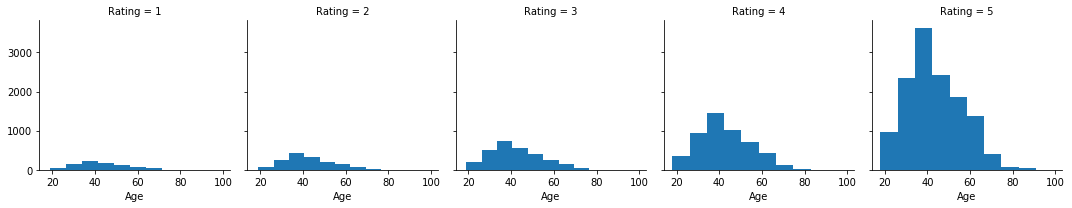

In [13]:
g = sns.FacetGrid(df, col = "Rating", col_wrap = 5)
g.map(plt.hist, "Age")

* Great deal of reviews are positive (4-5 marks)
* Distribution is almost the same right-skewed (is it?) in all graphs with a median at about 40 years old

In [14]:
df['positive'] = np.where(df.Rating > 3, 1, 0)

In [15]:
positives = df.Age[df.positive == 1]
negatives = df.Age[df.positive != 1]

In [16]:
positives.shape, negatives.shape

((18208,), (5278,))

In [17]:
%pylab inline

from scipy import stats

Populating the interactive namespace from numpy and matplotlib


In [18]:
print('Mean Age for P.Marks: {}\nMean Afe for N.Marks: {}'.format(round(np.mean(positives), 3), 
                                                                  round(np.mean(negatives), 3)))

Mean Age for P.Marks: 43.389
Mean Afe for N.Marks: 42.541


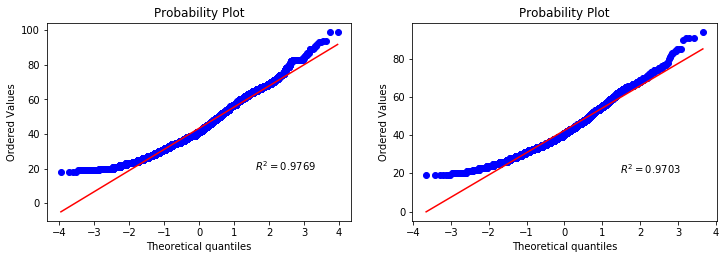

In [19]:
pylab.figure(figsize=(12,8))
pylab.subplot(2,2,1)
stats.probplot(positives, dist="norm", plot=pylab, rvalue = True)
pylab.subplot(2,2,2)
stats.probplot(negatives, dist="norm", plot=pylab, rvalue = True)
pylab.show()

In [20]:
stats.ttest_ind(positives, negatives, equal_var = False)

Ttest_indResult(statistic=4.528243265172696, pvalue=6.025086213473982e-06)

**Conclusions and assumptions:**

* We used t-test for individual samples because we have a near normal distribution and we assume that each user buy / reviews independently
* There is a statistically significant defference in age of positive and negative feedback, but for only about 1 year

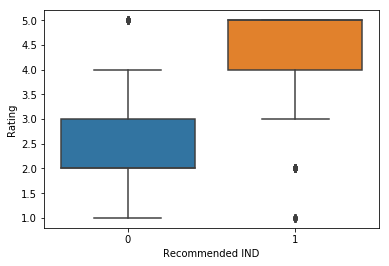

In [21]:
sns.boxplot(x = 'Recommended IND', y = 'Rating', data = df)

In [22]:
def percent(x, n = 2):
    return str(round(float(x), n) *100) + '%'

In [23]:
print('Share of positive Rating and Recommended Reviews:', percent(np.sum(df.Rating.isin([4,5]) == df['Recommended IND'].astype('bool')) / df.shape[0]))

Share of positive Rating and Recommended Reviews: 94.0%


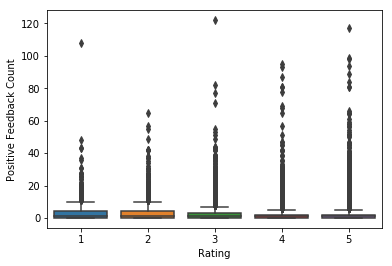

In [24]:
sns.boxplot(x = 'Rating', y = 'Positive Feedback Count', data = df)

In [25]:
df[(df['Positive Feedback Count'] != 0)].groupby('Rating')['Positive Feedback Count'].agg([np.mean, np.median])

,mean,median
Rating,,
1,5.837675,3
2,5.531350,3
3,5.512821,3
4,4.753990,2
5,4.532193,2


**Conclusions:**

* Users tend to recommend products when giving rating between 4 and 5
* Strange fact: in 1-3 Rating there is more users who find the feedback positive (maybe the meaning is "useful?", we can check with sentiment analysis)

In [26]:
#import nltk
#nltk.download('vader_lexicon')

In [27]:
review_text = df['Review Text'].values.astype('str')

In [28]:
def demo_vader_instance(text):
    """
    Output polarity scores for a text using Vader approach.

    :param text: a text whose polarity has to be evaluated.
    """
    from nltk.sentiment import SentimentIntensityAnalyzer
    vader_analyzer = SentimentIntensityAnalyzer()
    return vader_analyzer.polarity_scores(text)['compound']

In [29]:
%%time
vader_scores = []

for review in review_text: vader_scores.append(demo_vader_instance(review))

Wall time: 6min 39s


In [30]:
df['review_vader_score'] = vader_scores

In [31]:
df.groupby('Rating')['Positive Feedback Count', 'review_vader_score'].mean()

,Positive Feedback Count,review_vader_score
Rating,,
1,3.459620,0.202879
2,3.325879,0.394367
3,3.145246,0.528778
4,2.405554,0.719112
5,2.299749,0.814656


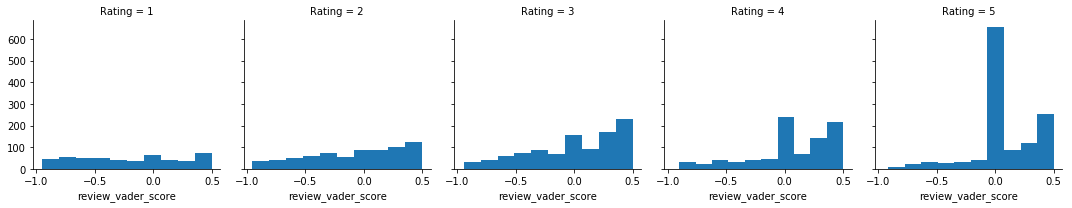

In [32]:
g = sns.FacetGrid(df[df.review_vader_score <= .5], col = "Rating", col_wrap = 5)
g.map(plt.hist, "review_vader_score")

**Conclusions:**

* The shape of histograms that there are much more positive or neutral reviews in Ratings 3-4 (which is anticipated)
* The meaning of Positive Feedback Count is still ambiguous

### Make a prediction

We will try to predict if a review is positive (Rating 4-5) or negative (Rating 1-3).

In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from nltk.stem.snowball import SnowballStemmer
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

In [34]:
model_data = df[['Age', 'Review Text', 'Positive Feedback Count', 'review_vader_score', 'positive']]

In [35]:
model_data['Review Text'] = np.where(df['Review Text'].isnull(), '', df['Review Text'])

In [36]:
model_data.positive.value_counts()

1    18208
0     5278
Name: positive, dtype: int64

The data is unbalanced.

In [37]:
stemmer = SnowballStemmer("english")
model_data['stemmed'] = df['Review Text'].astype('str').map(lambda x: ' '.join([stemmer.stem(y) for y in x.split(' ')]))

In [38]:
X = model_data.drop(['positive', 'Review Text'], axis = 1)
y = model_data['positive']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=144)

In [40]:
%%time

tfidf = TfidfVectorizer(stop_words = 'english', ngram_range = (1, 3), min_df = .01)

tf_idf_train = tfidf.fit_transform(X_train.stemmed)
tf_idf_test = tfidf.transform(X_test.stemmed)

Wall time: 7.11 s


In [41]:
scaler = StandardScaler()

scaler.fit(X_train.drop('stemmed', axis = 1))

num_train = scaler.transform(X_train.drop('stemmed', axis = 1))
num_test = scaler.transform(X_test.drop('stemmed', axis = 1))

In [42]:
X_train_mod = np.hstack((num_train, tf_idf_train.toarray()))
X_test_mod = np.hstack((num_test, tf_idf_test.toarray()))

In [43]:
LR = LogisticRegression(random_state = 144, class_weight='balanced')

params = {'penalty': ['l1', 'l2'], 'C': [0.01, 0.05, 0.1, 0.5, 1, 5, 10]}
cv = 5

gcv = GridSearchCV(LR, params, cv = cv, scoring = 'f1')

In [44]:
%%time

gcv.fit(X_train_mod, y_train)

print('Best parameters:', gcv.best_params_)

Best parameters: {'C': 0.1, 'penalty': 'l2'}
Wall time: 20.7 s


In [45]:
predicted = gcv.predict(X_test_mod)

In [46]:
print('Accuracy =', np.sum(predicted == y_test)/y_test.shape)

Accuracy = [0.8366449]


In [47]:
print('Recall: {}\nPrecision: {}'.format(round(recall_score(y_test, predicted), 2), 
                                         round(precision_score(y_test, predicted), 2)))

Recall: 0.85
Precision: 0.93


In [48]:
coefs = gcv.best_estimator_.coef_.flatten()
predictors = list(X_train.drop('stemmed', axis = 1).columns.values) + tfidf.get_feature_names()

In [49]:
pred_coefs = pd.DataFrame(data = {'variable_name': predictors, 'coefficient': coefs})

pred_coefs.sort_values(by='coefficient', ascending = False).head(15)

,variable_name,coefficient
281,perfect,2.132785
251,nan,1.750573
221,littl,1.487184
373,soft,1.359004
166,great,1.310684
77,comfort,1.235611
78,comfortable,1.233662
470,worn,1.176968
53,bought,1.131859
81,compliment,1.062492
